In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


#### one easy way by using Pandas: (mean normalization)

normalized_df=(df-df.mean())/df.std()

#### or to use min-max normalization:

normalized_df=(df-df.min())/(df.max()-df.min())

#### or use my own defined min-max normalization function:

In [9]:
def NormalizeData(data):

    return (data - np.min(data)) / (np.max(data) - np.min(data))

### process input data with pandas 

* #drop columns which have more than 94% NaN's (or less than 6% values) by index

* col no.=7, EtCO2, 1, 0%
* col no.=13, SaO2, 4572, 8%
* col no.=14, AST, 3020, 5%
* col no.=16, Alkalinephos, 2902, 5%
* col no.=20, Bilirubin_direct, 224, 0%
* col no.=22, Lactate, 3085, 5%
* col no.=26, Bilirubin_total, 2581, 4%
* col no.=27, TroponinI, 218, 0%
* col no.=32, Fibrinogen, 812, 1%

0s:38416
1s:16090
1s/0s ratio  = 41 %

#### change HospAdmTime from negative to positive
train.HospAdmTime = -1 * train.HospAdmTime
#### replace NaN with mean
train=train.fillna(train.mean())

In [10]:
train = pd.read_csv("../data/setA_train.psv", sep='|')
print(train.shape)
#print(train)
#drop columns which have more than 94% NaN's by index
#cols = [7,14,16,20,22,26,27,32]


(43646, 41)


In [11]:
cols = [7]
train.HospAdmTime = -1 * train.HospAdmTime
train=train.drop(train.columns[cols],axis=1)
#replace NaN with mean
#train[np.isnan(train)] = -99
#replace NaN with mean
#train[np.isnan(train)] = -99
train.fillna(-99, inplace=True)
#train.fillna(train.mean(),inplace=True)
#train.fillna(train.median(),inplace=True)
#for back-fill
#train.fillna(method='bfill',inplace=True)
#for forward-fill
#train.fillna(method='ffill',inplace=True)
#train=train.fillna(train.mean())

In [12]:
train=train.values
test = pd.read_csv("../data/setA_test.psv", sep='|')
#train, test = train_test_split(train, test_size=0.2)
#print(train.shape)
#print(train)
test.HospAdmTime = -1 * test.HospAdmTime
test=test.drop(test.columns[cols],axis=1)
#replace NaN with mean
test[np.isnan(test)] = -99
#test=test.fillna(test.mean())
test=test.values

#train, test = train_test_split(train, test_size=0.2)
#print(train.shape)
#print(train)


In [13]:
x_train_raw = train[:, :-1] # for all but last column
n_rows, n_cols = x_train_raw.shape
 
x_test_raw = test[:, :-1]
y_train = train[:, -1]  # for last column
y_test = test[:, -1]  # for last column

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(n_cols,)),
 #   keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
 #   keras.layers.Dense(3, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
 #   keras.layers.Dropout(0.2),
])
keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
x_train = NormalizeData(x_train_raw)
x_test = NormalizeData(x_test_raw)
#x_train = x_train_raw
#x_test = x_test_raw
print(x_test)
print(y_test)

[[0.02522051 0.02673649 0.         ... 0.         0.01364802 0.01998346]
 [0.02742558 0.02556505 0.         ... 0.         0.01364802 0.02039691]
 [0.02852811 0.02687431 0.         ... 0.01364388 0.01365077 0.01943219]
 ...
 [0.03293826 0.02701213 0.         ... 0.         0.01364802 0.01819184]
 [0.03018192 0.02687431 0.         ... 0.         0.01364802 0.01832966]
 [0.02949283 0.02673649 0.         ... 0.         0.01364802 0.01846748]]
[0. 0. 0. ... 1. 1. 1.]


In [30]:
model.fit(x_train, y_train, epochs=50)
classifications = model.predict(x_test)
print(classifications)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

Epoch 1/50
43646/43646 [==============================] - 3s 72us/step - loss: 0.6174 - acc: 0.7020
Epoch 2/50
43646/43646 [==============================] - 2s 54us/step - loss: 0.5229 - acc: 0.7703
Epoch 3/50
43646/43646 [==============================] - 2s 53us/step - loss: 0.4718 - acc: 0.8421
Epoch 4/50
43646/43646 [==============================] - 2s 54us/step - loss: 0.4397 - acc: 0.8548
Epoch 5/50
43646/43646 [==============================] - 2s 55us/step - loss: 0.4138 - acc: 0.8603
Epoch 6/50
43646/43646 [==============================] - 2s 53us/step - loss: 0.3911 - acc: 0.8643
Epoch 7/50
43646/43646 [==============================] - 2s 52us/step - loss: 0.3717 - acc: 0.8660
Epoch 8/50
43646/43646 [==============================] - 2s 53us/step - loss: 0.3569 - acc: 0.8684
Epoch 9/50
43646/43646 [==============================] - 2s 53us/step - loss: 0.3455 - acc: 0.8699
Epoch 10/50
43646/43646 [==============================] - 2s 53us/step - loss: 0.3368 - acc: 0.8718

In [31]:
# predict probabilities for test set
y_predict_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
y_predict_classes = model.predict_classes(x_test, verbose=0)

In [32]:
#np.set_printoptions(threshold=np.inf)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [33]:
# reduce to 1d array
y_probs = y_predict_probs[:, 0]
y_classes = y_predict_classes[:, 0]
print(y_probs)
print(y_classes)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_classes)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
print('Confusion_matrix:')
print('                    TrueP FalseN')
print('                    FalseP TrueN')
#labels must be specified as [1,0]. Without it, confusion_matrix
#will report negative on the 1st row then positives on the 2nd row
#note: predictions are in columns and actual values in rows !!
matrix = confusion_matrix(y_test, y_classes, labels=[1, 0])
print(matrix)

[0.4596303  0.13054661 0.10595818 ... 0.9998016  0.99978524 0.09003381]
[0 0 0 ... 1 1 0]
Accuracy: 0.871952
Precision: 0.864528
Recall: 0.683881
F1 score: 0.763667
Cohens kappa: 0.677485
ROC AUC: 0.915492
Confusion_matrix:
                    TrueP FalseN
                    FalseP TrueN
[[2291 1059]
 [ 359 7365]]


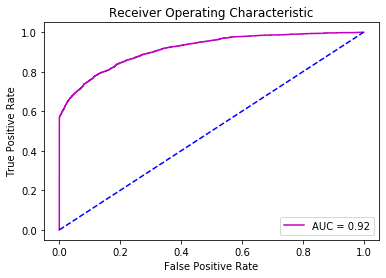

In [34]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_probs)
roc_auc = metrics.auc(fpr, tpr)
# plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'm', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
